In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
from torch import optim
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

## Define models

In [12]:
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    # First convolutional layer (in_channels, out_channels, kernel_size) , out_channels = number of filters
    # 3 input channels, 6 output channels, 5x5 kernel size
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 2)
  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x))) #apply conv. then apply pooling
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1)
    x = self.fc1(x)
    return x

class Generator_0(nn.Module):
    def __init__(self):
        super(Generator_0, self).__init__()
        self.main = nn.Sequential(
            nn.Conv3d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv3d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.main(x)

class Generator_2(nn.Module):
    def __init__(self):
        super(Generator_2, self).__init__()
        self.main = nn.Sequential(
            nn.Conv3d(6, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv3d(64, 6, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.main(x)

## Define device

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## Load models

In [14]:
G_A2B_0 = Generator_0().to(device)
G_A2B_0.load_state_dict(torch.load('./generator_A2B.pth',weights_only = True))

G_B2A_0 = Generator_0().to(device)
G_B2A_0.load_state_dict(torch.load('./generator_B2A.pth',weights_only = True))

G_A2B_2 = Generator_2().to(device)
G_A2B_2.load_state_dict(torch.load('./2_generator_A2B.pth',weights_only = True))

G_B2A_2 = Generator_2().to(device)
G_B2A_2.load_state_dict(torch.load('./2_generator_B2A.pth',weights_only = True))

cnn_model = CNN().to(device)

In [16]:
model = 3
real_A_2 = torch.load(f'./black_layers_permuted/2/2_{model:04}.pth', weights_only=True).to(device)
real_A_0 = torch.load(f'./cat_layers_permuted/0/0_{model:04}.pth', weights_only=True).to(device)
real_B_2 = torch.load(f'./cat_layers_permuted/2/2_{model:04}.pth', weights_only=True).to(device)
real_B_0 = torch.load(f'./cat_layers_permuted/0/0_{model:04}.pth', weights_only=True).to(device)


# Assuming G_A and G_B are your trained generators
G_A2B.to(device).eval()
G_B2A.to(device).eval()

# Generate layer0 fake images (domain A -> B and B -> A)
fake_B_0 = G_A2B_0(real_A_0).permute(1, 0, 2, 3)
fake_A_0 = G_B2A_0(real_B_0).permute(1, 0, 2, 3)

# Generate layer2 fake images (domain A -> B and B -> A)
fake_B_2 = G_A2B_2(real_A_2).permute(1, 0, 2, 3)
fake_A_2 = G_B2A_2(real_B_2).permute(1, 0, 2, 3)

## Visualise

In [23]:
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
        n,c,w,h = tensor.shape

        if allkernels: tensor = tensor.view(n*c, -1, w, h)
        elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

        rows = np.min((tensor.shape[0] // nrow + 1, 64))    
        grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
        plt.figure( figsize=(nrow,rows) )
        plt.imshow(grid.numpy().transpose((1, 2, 0)))


torch.Size([6, 3, 5, 5])
torch.Size([16, 6, 5, 5])
torch.Size([6, 3, 5, 5])
torch.Size([16, 6, 5, 5])


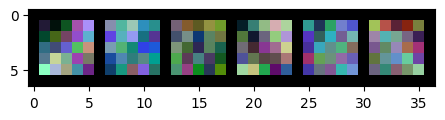

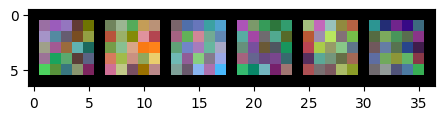

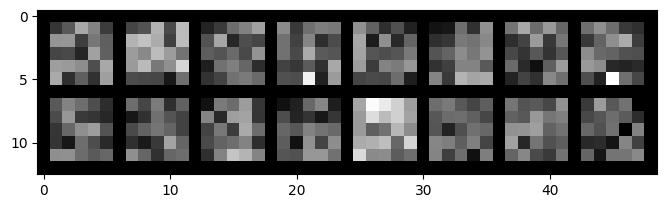

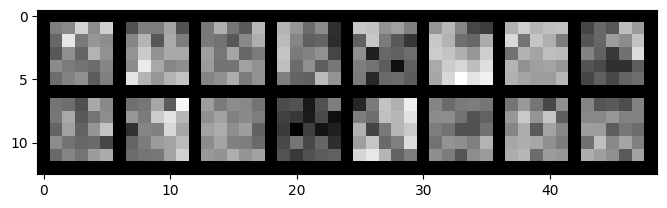

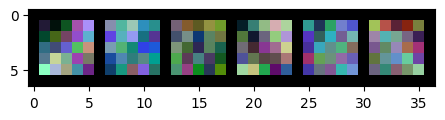

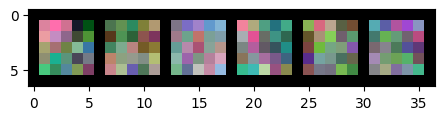

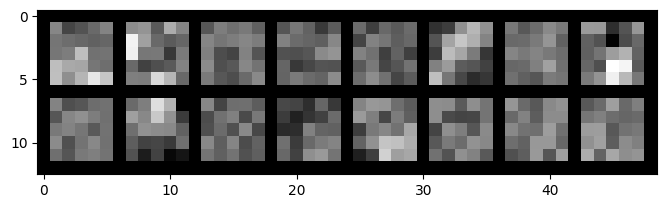

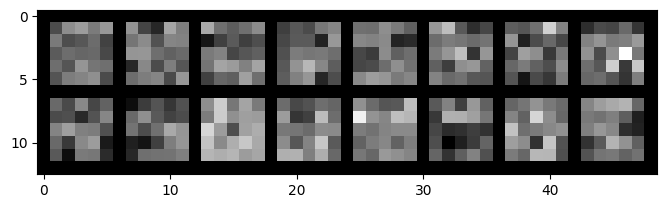

In [30]:

print(fake_A_0.shape)
print(fake_A_2.shape)
visTensor(real_A_0.cpu().permute(1, 0, 2, 3), ch=0, allkernels=False)
visTensor(fake_A_0.cpu(), ch=0, allkernels=False)
visTensor(real_A_2.cpu().permute(1, 0, 2, 3), ch=0, allkernels=False)
visTensor(fake_A_2.cpu(), ch=0, allkernels=False)

print(fake_B_0.shape)
print(fake_B_2.shape)
visTensor(real_B_0.cpu().permute(1, 0, 2, 3), ch=0, allkernels=False)
visTensor(fake_B_0.cpu(), ch=0, allkernels=False)
visTensor(real_B_2.cpu().permute(1, 0, 2, 3), ch=0, allkernels=False)
visTensor(fake_B_2.cpu(), ch=0, allkernels=False)